In [1]:
import seaborn as sns
import pandas as pd
import math
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# data prep
from sklearn.model_selection import train_test_split
# ML algos
from sklearn.linear_model import LinearRegression
# metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

In [2]:
revenue = {"Date": ['2000q1','2000q2','2000q3','2000q4','2001q1','2001q2','2001q3','2001q4','2002q1','2002q2','2002q3','2002q4'],
           "Revenue": ['1517','1248','1677','1393','1558', '1368', '1790', '1396', '1638', '1507', '1868', '1510'],
           "Europe_GDP": ['1728.244', '1749.6', '1769.2586', '1789.2533','1819.1398', '1833.7128', '1845.8787', '1861.9357', '1878.7827', '1893.8006', '1914.8373', '1927.3414'],
           "China_GDP": ['257.65', '290.44', '310.55', '352.7', '290.97', '322.92', '342.32', '383.2', '317.67', '352.72', '377.63', '422.48'],
           "Price_index": ['246.5', '326.4', '322.5', '321', '329.4', '329.8', '313.3', '302.1', '296.5', '301', '298.9', '292.2'],
           "Nike_revenue": ['2161.6', '2272.7', '2636.7', '2198.7', '2170.1', '2483.3', '2613.7', '2336.8', '2260.3', '2682.2', '2796.3', '2514.7']}

In [3]:
df = pd.DataFrame(revenue)
df['Time'] = np.arange(len(df.index))
df.head()

,Date,Revenue,Europe_GDP,China_GDP,Price_index,Nike_revenue,Time
0,2000q1,1517,1728.244,257.65,246.5,2161.6,0
1,2000q2,1248,1749.6,290.44,326.4,2272.7,1
2,2000q3,1677,1769.2586,310.55,322.5,2636.7,2
3,2000q4,1393,1789.2533,352.7,321,2198.7,3
4,2001q1,1558,1819.1398,290.97,329.4,2170.1,4


In [4]:
df['Revenue'] = df['Revenue'].astype('float64')
df['Europe_GDP'] = df['Europe_GDP'].astype('float64')
df['China_GDP'] = df['China_GDP'].astype('float64')
df['Price_index'] = df['China_GDP'].astype('float64')
df['Nike_revenue'] = df['Nike_revenue'].astype('float64')

In [5]:
df.describe()

,Revenue,Europe_GDP,China_GDP,Price_index,Nike_revenue,Time
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1539.166667,1834.315408,335.104167,335.104167,2427.258333,5.500000
std,180.525412,64.997564,46.147356,46.147356,221.459984,3.605551
min,1248.000000,1728.244000,257.650000,257.650000,2161.600000,0.000000
25%,1395.250000,1784.254625,305.655000,305.655000,2244.900000,2.750000
50%,1513.500000,1839.795750,332.620000,332.620000,2410.050000,5.500000
75%,1647.750000,1882.537175,358.947500,358.947500,2619.450000,8.250000
max,1868.000000,1927.341400,422.480000,422.480000,2796.300000,11.000000


<div class="alert alert-block alert-success">

**Could you make a prediction about the trend of the total revenue for the third quarter for both Adidas and Nike? If yes, do you expect the revenue of 2003 to increase or decrease during the same quarter?**

</div>

<div class="alert alert-block alert-success">

**ADIDAS**

</div>

In [99]:
df['Revenue_log'] = np.log(df['Revenue'])

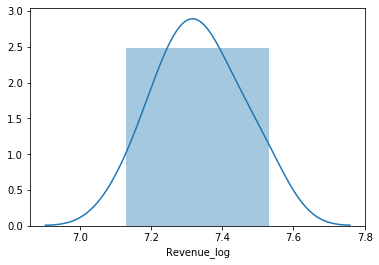

In [100]:
sns.distplot(df['Revenue_log'])

In [6]:
X = np.array(df['Time'])
y = np.array(df['Revenue'])
X = X.reshape(-1, 1)
y = y.reshape(-1,1)

In [19]:
test_size = 4 #75:25 split

X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]

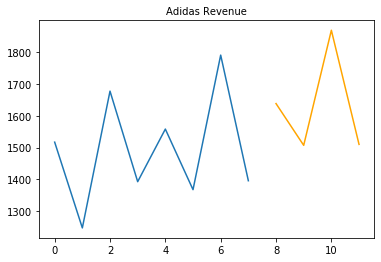

In [20]:
plt.title('Adidas Revenue', size = 10)
#plt.scatter(df['Time'],df['Revenue'])
plt.plot(X_test, y_test, label = 'Test set', color = 'orange')
plt.plot(X_train, y_train, label = 'Train set')

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)
#model.score(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = model.predict(X_test)

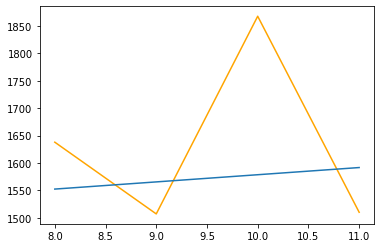

In [24]:
plt.plot(X_test, y_test, label = 'Test set', color = 'orange')
plt.plot(X_test, y_pred, label = 'Train set')

In [26]:
y_pred_period = model.predict(X)

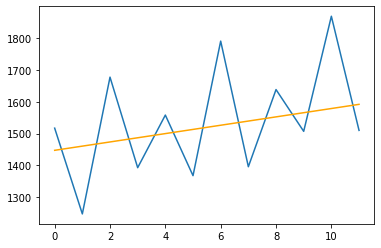

In [28]:
plt.plot(X, y, label = 'Adidas Revenue')
plt.plot(X, y_pred_period, label = 'Model', color = 'orange')

In [33]:
from dmba import regressionSummary
regressionSummary(y, model.predict(X))


Regression statistics

                      Mean Error (ME) : 19.5774
       Root Mean Squared Error (RMSE) : 162.2502
            Mean Absolute Error (MAE) : 142.0536
          Mean Percentage Error (MPE) : 0.1642
Mean Absolute Percentage Error (MAPE) : 9.1514


<div class="alert alert-block alert-success">

**ADIDAS PREDICTIONS**

</div>

In [34]:
future_revenue = {"Date": ['2003q1','2003q2','2003q3','2003q4']}

In [35]:
df2 = pd.DataFrame(future_revenue)
new_dates = pd.concat([df['Date'],df2['Date']],ignore_index = True)
df2 = pd.DataFrame(new_dates)
df2['Time'] = np.arange(len(df2.index))
df2['Revenue'] = df['Revenue']

df2

,Date,Time,Revenue
0,2000q1,0,1517.0
1,2000q2,1,1248.0
2,2000q3,2,1677.0
3,2000q4,3,1393.0
4,2001q1,4,1558.0
5,2001q2,5,1368.0
6,2001q3,6,1790.0
7,2001q4,7,1396.0
8,2002q1,8,1638.0
9,2002q2,9,1507.0


In [36]:
X = np.array(df2['Time'])
X = X.reshape(-1, 1)

In [37]:
df2['Predict'] = model.predict(X)
df2

,Date,Time,Revenue,Predict
0,2000q1,0,1517.0,1447.500000
1,2000q2,1,1248.0,1460.607143
2,2000q3,2,1677.0,1473.714286
3,2000q4,3,1393.0,1486.821429
4,2001q1,4,1558.0,1499.928571
5,2001q2,5,1368.0,1513.035714
6,2001q3,6,1790.0,1526.142857
7,2001q4,7,1396.0,1539.250000
8,2002q1,8,1638.0,1552.357143
9,2002q2,9,1507.0,1565.464286


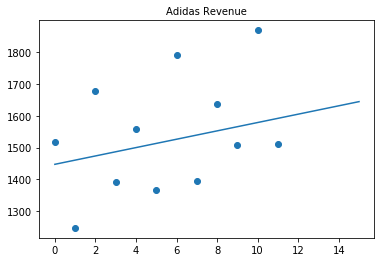

In [38]:
plt.title('Adidas Revenue', size = 10)
plt.scatter(df['Time'],df['Revenue'])
plt.plot(df2['Time'], df2['Predict'], label = 'Predicted')

According to the linear regression model (MAPE = 9.15%), 2003Q3 is forecasted to present a value of 1631. When compared to previous results fromo the model, the revenue is showing an expected increase. 

Using the website https://www.calculator.net/z-score-calculator.html?c1raw=7.5326&c1mean=7.3327&c1sd=0.1166&calctype=zscore&x=93&y=17 and using the mean (7.3327) and stdev (0.1166) of the logarithimic value of Adidas revenue, the chance of the Revenue to be higher than 2002Q3(7.53) is P(X<Z) = 0.95677. That is, the probability of 2003Q3 revenue to be higher than 2002Q3 is around 4.3%.

<div class="alert alert-block alert-success">

**NIKE**

</div>

For Nike, the same methodology was used

In [101]:
df['Nike_Revenue_log'] = np.log(df['Nike_revenue'])

In [102]:
df['Nike_Revenue_log']

0     7.678604
1     7.728724
2     7.877283
3     7.695622
4     7.682529
5     7.817344
6     7.868522
7     7.756538
8     7.723253
9     7.894393
10    7.936052
11    7.829909
Name: Nike_Revenue_log, dtype: float64

In [85]:
X = np.array(df['Time'])
y = np.array(df['Nike_revenue'])
X = X.reshape(-1, 1)
y = y.reshape(-1,1)

In [86]:
test_size = 4 #75:25 split

X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]

In [87]:
model = LinearRegression()
model.fit(X_train,y_train)
#model.score(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_pred = model.predict(X_test)

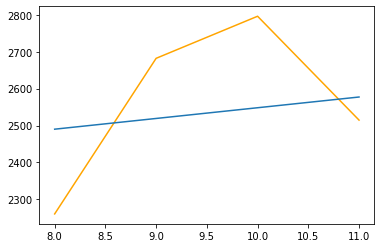

In [89]:
plt.plot(X_test, y_test, label = 'Test set', color = 'orange')
plt.plot(X_test, y_pred, label = 'Train set')

In [90]:
y_pred_period = model.predict(X)

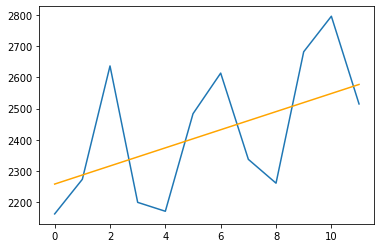

In [91]:
plt.plot(X, y, label = 'Nike Revenue')
plt.plot(X, y_pred_period, label = 'Model', color = 'orange')

In [92]:
from dmba import regressionSummary
regressionSummary(y, model.predict(X))


Regression statistics

                      Mean Error (ME) : 9.9012
       Root Mean Squared Error (RMSE) : 176.7899
            Mean Absolute Error (MAE) : 155.8589
          Mean Percentage Error (MPE) : -0.1419
Mean Absolute Percentage Error (MAPE) : 6.3631


<div class="alert alert-block alert-success">

**NIKE PREDICTIONS**

</div>

In [93]:
df2['Nike_revenue'] = df['Nike_revenue']


df2

,Date,Time,Revenue,Predict,Nike_revenue
0,2000q1,0,1517.0,1447.500000,2161.6
1,2000q2,1,1248.0,1460.607143,2272.7
2,2000q3,2,1677.0,1473.714286,2636.7
3,2000q4,3,1393.0,1486.821429,2198.7
4,2001q1,4,1558.0,1499.928571,2170.1
5,2001q2,5,1368.0,1513.035714,2483.3
6,2001q3,6,1790.0,1526.142857,2613.7
7,2001q4,7,1396.0,1539.250000,2336.8
8,2002q1,8,1638.0,1552.357143,2260.3
9,2002q2,9,1507.0,1565.464286,2682.2


In [94]:
X = np.array(df2['Time'])
X = X.reshape(-1, 1)

In [95]:
df2['Nike_Predict'] = model.predict(X)
df2

,Date,Time,Revenue,Predict,Nike_revenue,Nike_Predict
0,2000q1,0,1517.0,1447.500000,2161.6,2257.425000
1,2000q2,1,1248.0,1460.607143,2272.7,2286.503571
2,2000q3,2,1677.0,1473.714286,2636.7,2315.582143
3,2000q4,3,1393.0,1486.821429,2198.7,2344.660714
4,2001q1,4,1558.0,1499.928571,2170.1,2373.739286
5,2001q2,5,1368.0,1513.035714,2483.3,2402.817857
6,2001q3,6,1790.0,1526.142857,2613.7,2431.896429
7,2001q4,7,1396.0,1539.250000,2336.8,2460.975000
8,2002q1,8,1638.0,1552.357143,2260.3,2490.053571
9,2002q2,9,1507.0,1565.464286,2682.2,2519.132143


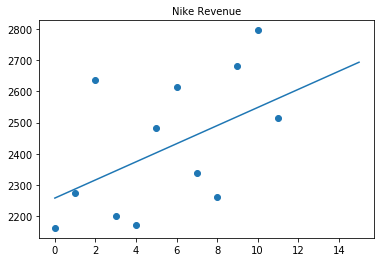

In [97]:
plt.title('Nike Revenue', size = 10)
plt.scatter(df['Time'],df['Nike_revenue'])
plt.plot(df2['Time'], df2['Nike_Predict'], label = 'Predicted')


The model generated for Nike presented a MAPE of 6.36%. The model is predicting an increase in revenue for 2003Q3 when compared to 2002Q3.  

However, according to the z-score, P(X<7.9360) = 0.94554. This means that there is a 5.4% chances that the revenue will increase in Q3 of 2003.


Raw score = 7.9360
Mean = 7.7907
stdev = 0.0907
Z score = 1.60198


<div class="alert alert-block alert-success">

**Could you make the same prediction about Adidas’s sales in China and about the price index for the same quarter in 2003? If no, can you make a conclusion for these features about any of the quarters?**

</div>

According to the table, the sales in China are not explicitly provided. 

Obviously, it is possible to see that both Revenue and GDP increase in Europe. Therefore, a correlation between GDP and Revenue might exist. However, to assume that GDP is the only factor affecting Revenue is misleading and, therefore, I believe that this is not something that is possible to be calculated.

Price index calculations were conducted in the same way as the previous models. Results are shown below.

<div class="alert alert-block alert-success">

**PRICE INDEX**

</div>

In [105]:
df['Price_index_log'] = np.log(df['Price_index'])

In [120]:
df['Price_index_log']

0     5.551602
1     5.671397
2     5.738345
3     5.865618
4     5.673220
5     5.777405
6     5.835746
7     5.948557
8     5.761013
9     5.865675
10    5.933915
11    6.046142
Name: Price_index_log, dtype: float64

In [107]:
X = np.array(df['Time'])
y = np.array(df['Price_index'])
X = X.reshape(-1, 1)
y = y.reshape(-1,1)

In [108]:
test_size = 4 #75:25 split

X_train, X_test, y_train, y_test = X[:-test_size], X[-test_size:], y[:-test_size], y[-test_size:]

In [109]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
y_pred = model.predict(X_test)

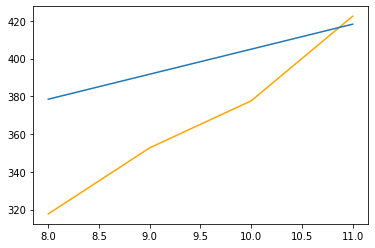

In [111]:
plt.plot(X_test, y_test, label = 'Test set', color = 'orange')
plt.plot(X_test, y_pred, label = 'Train set')

In [112]:
y_pred_period = model.predict(X)

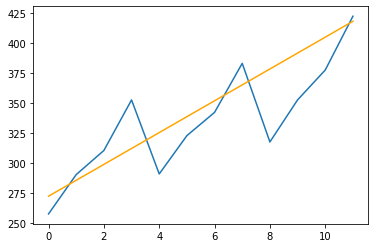

In [113]:
plt.plot(X, y, label = 'Price Index')
plt.plot(X, y_pred_period, label = 'Model', color = 'orange')

In [114]:
regressionSummary(y, model.predict(X))


Regression statistics

                      Mean Error (ME) : -10.2546
       Root Mean Squared Error (RMSE) : 28.6697
            Mean Absolute Error (MAE) : 23.4175
          Mean Percentage Error (MPE) : -3.3554
Mean Absolute Percentage Error (MAPE) : 7.1095


<div class="alert alert-block alert-success">

**PRICE INDEX PREDICTIONS**

</div>

In [115]:
X = np.array(df2['Time'])
X = X.reshape(-1, 1)

In [116]:
df2['Price_index'] = df['Price_index']

,Date,Time,Revenue,Predict,Nike_revenue,Nike_Predict,Price_index
0,2000q1,0,1517.0,1447.500000,2161.6,2257.425000,257.65
1,2000q2,1,1248.0,1460.607143,2272.7,2286.503571,290.44
2,2000q3,2,1677.0,1473.714286,2636.7,2315.582143,310.55
3,2000q4,3,1393.0,1486.821429,2198.7,2344.660714,352.70
4,2001q1,4,1558.0,1499.928571,2170.1,2373.739286,290.97
5,2001q2,5,1368.0,1513.035714,2483.3,2402.817857,322.92
6,2001q3,6,1790.0,1526.142857,2613.7,2431.896429,342.32
7,2001q4,7,1396.0,1539.250000,2336.8,2460.975000,383.20
8,2002q1,8,1638.0,1552.357143,2260.3,2490.053571,317.67
9,2002q2,9,1507.0,1565.464286,2682.2,2519.132143,352.72


In [117]:
df2['Price_index_predict'] = model.predict(X)
df2

,Date,Time,Revenue,Predict,Nike_revenue,Nike_Predict,Price_index,Price_index_predict
0,2000q1,0,1517.0,1447.500000,2161.6,2257.425000,257.65,272.4425
1,2000q2,1,1248.0,1460.607143,2272.7,2286.503571,290.44,285.7000
2,2000q3,2,1677.0,1473.714286,2636.7,2315.582143,310.55,298.9575
3,2000q4,3,1393.0,1486.821429,2198.7,2344.660714,352.70,312.2150
4,2001q1,4,1558.0,1499.928571,2170.1,2373.739286,290.97,325.4725
5,2001q2,5,1368.0,1513.035714,2483.3,2402.817857,322.92,338.7300
6,2001q3,6,1790.0,1526.142857,2613.7,2431.896429,342.32,351.9875
7,2001q4,7,1396.0,1539.250000,2336.8,2460.975000,383.20,365.2450
8,2002q1,8,1638.0,1552.357143,2260.3,2490.053571,317.67,378.5025
9,2002q2,9,1507.0,1565.464286,2682.2,2519.132143,352.72,391.7600


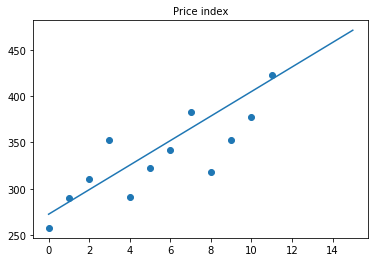

In [118]:
plt.title('Price index', size = 10)
plt.scatter(df['Time'],df['Price_index'])
plt.plot(df2['Time'], df2['Price_index_predict'], label = 'Predicted')

The model generated for Price index presented a MAPE of 7.1%. The model is predicting an increase in for 2003Q3 when compared to 2002Q3. From 377.63 to 458.04.

According to the z-score, P(X<5.9339) = 0.82308. This means that there is a 17.6% chances that the revenue will increase in Q3 of 2003.

Raw score = 5.9339
Mean = 5.8057 
stdev = 0.1382 
Z score = 0.92717

<div class="alert alert-block alert-success">

**Finally, which of the techniques or concepts you have learnt about in this programme so far would you use to draw your conclusions?**

</div>

The concepts of probability distribution, normal curves, standard deviations, mean, linear regression and estimators were important for me to draw my conclusions.